# Intro

While implementing the algorithms yourself is important to gain deeper understanding of it, it's also important to be able to use tools adapted in the industry. In this notebook i will demonstrate linear regression using scikit-learn, PyTorch and Tensorflow libraries.<br>
<br>
<u>Important note:</u> this is just a demo of fitting linear regression model on random generated data. I will not go through the whole procedure of loading data, data exploration, visualization and analysis. I will leave that for another notebook.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generate random data
a = 10.2
b = 3.4

x = np.linspace(0, 6, 100).reshape((-1, 1))
e = np.random.randint(-10, 10, x.shape)
y = a*x + b + e

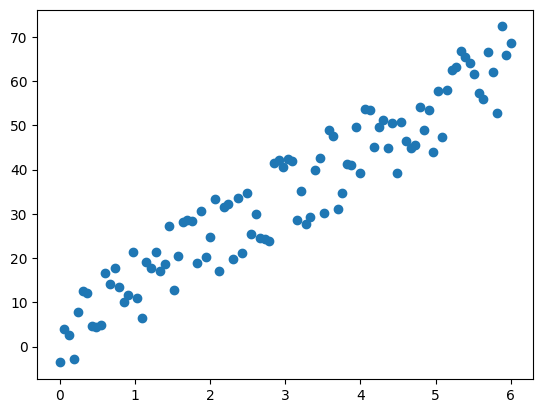

In [2]:
# Visualize data
plt.scatter(x, y)
plt.show()

# Scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x, y)

LinearRegression()

In [9]:
# Retrieve weight (coefficient) and bias (intercept) of the linear model
w = linear_regression.coef_
b = linear_regression.intercept_

print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [[10.27920792]]
Bias: [2.36237624]


In [18]:
# Predict values using our model, by explicitly using parameters
y_pred_wb = w*x + b

# Predict values using linear regression object's method
y_pred = linear_regression.predict(x)

print(f"y_pred_wb == y_pred_method: {all(y_pred_wb == y_pred)}")

y_pred_wb == y_pred_method: True


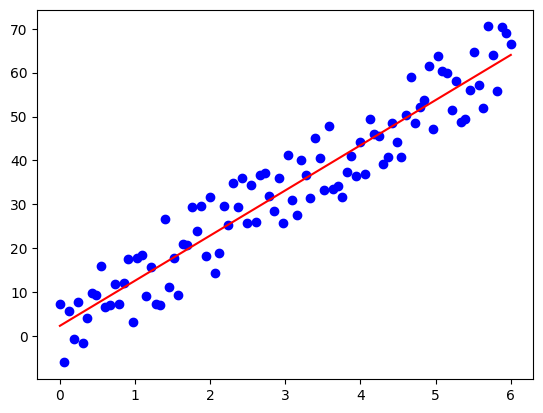

In [19]:
# Visualize
plt.scatter(x, y, color='b')
plt.plot(x, y_pred, color='r')

plt.show()

In [22]:
# Calculate the error value:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 33.04079807980798


# PyTorch

In [3]:
import torch

# Define the model as single Linear transformation
model = torch.nn.Linear(in_features=1, out_features=1, bias=True)

# Define loss function - Mean Squared Error
loss_func = torch.nn.MSELoss()

# Define optimizer - Stochastic Gradient Descent
alpha = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# Convert input and output data from numpy arrays to tensors
x_pt = torch.from_numpy(x).float()
y_pt = torch.from_numpy(y).float()

In [4]:
# Training
num_epochs = 10

for epoch in range(num_epochs):
    # Clear gradient buffers
    optimizer.zero_grad()
    
    # Forward pass
    y_pred_pt = model(x_pt)

    # Backward pass
    # Get loss
    loss = loss_func(y_pred_pt, y_pt)
    # Get gradients with respect to parameters
    loss.backward()

    # Update parameters
    optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] loss - {loss.item()}")

Epoch [1/10] loss - 1343.0201416015625
Epoch [2/10] loss - 758.405029296875
Epoch [3/10] loss - 435.1763000488281
Epoch [4/10] loss - 256.464111328125
Epoch [5/10] loss - 157.6529541015625
Epoch [6/10] loss - 103.01774597167969
Epoch [7/10] loss - 72.8068618774414
Epoch [8/10] loss - 56.099815368652344
Epoch [9/10] loss - 46.8588752746582
Epoch [10/10] loss - 41.7458381652832


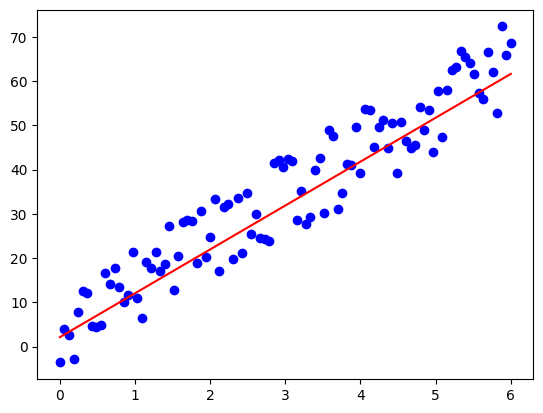

In [6]:
# Visualize results

y_pred_np = y_pred_pt.detach().numpy()

plt.scatter(x, y, color='b')
plt.plot(x, y_pred_np, color='r')

plt.show()